In [45]:
import os
os.chdir(os.getcwd())

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [47]:
orig_df = pd.read_csv("titanic_data_preprocessed.csv")
orig_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

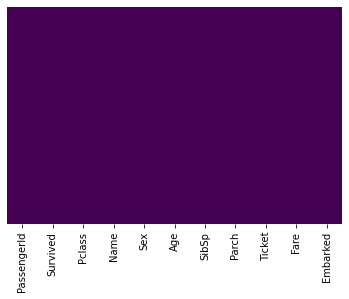

In [48]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [49]:
orig_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
orig_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [51]:
df = orig_df[['Pclass','Age','SibSp', 'Parch','Fare']]
df.tail()

,Pclass,Age,SibSp,Parch,Fare
886,2,27.000000,0,0,13.00
887,1,19.000000,0,0,30.00
888,3,29.699118,1,2,23.45
889,1,26.000000,0,0,30.00
890,3,32.000000,0,0,7.75


In [52]:
df.loc[891] = [3,63,5,6,37]

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [53]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.826596,-0.593507,0.424571,-0.469141,-0.502833
1,-1.567312,0.633943,0.424571,-0.469141,0.787174
2,0.826596,-0.286644,-0.474995,-0.469141,-0.489234
3,-1.567312,0.403797,0.424571,-0.469141,0.420856
4,0.826596,0.403797,-0.474995,-0.469141,-0.486716


In [54]:
df_normalized.describe()

,0,1,2,3,4
count,8.920000e+02,8.920000e+02,8.920000e+02,8.920000e+02,8.920000e+02
mean,2.324996e-16,-1.294430e-17,1.095287e-17,-9.957157e-19,-3.377654e-17
std,1.000561e+00,1.000561e+00,1.000561e+00,1.000561e+00,1.000561e+00
min,-1.567312e+00,-2.249030e+00,-4.749946e-01,-4.691414e-01,-6.488903e-01
25%,-3.703580e-01,-5.935067e-01,-4.749946e-01,-4.691414e-01,-4.893813e-01
50%,8.265962e-01,-2.864012e-03,-4.749946e-01,-4.691414e-01,-3.576978e-01
75%,8.265962e-01,4.037966e-01,4.245706e-01,-4.691414e-01,-2.298311e-02
max,8.265962e-01,3.856000e+00,6.721527e+00,6.787636e+00,9.672431e+00


Text(0, 0.5, 'SSE')

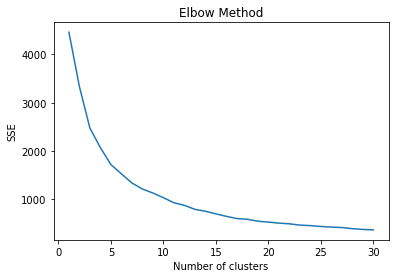

In [55]:
max_k = 31
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [56]:
# Choose value for k
k = 7

In [57]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=7)

In [58]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df.tail(10)

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_3617/1946195279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = cluster_predictions


,Pclass,Age,SibSp,Parch,Fare,cluster_id
882,3,22.000000,0,0,10.5167,0
883,2,28.000000,0,0,10.5000,0
884,3,25.000000,0,0,7.0500,0
885,3,39.000000,0,5,29.1250,5
886,2,27.000000,0,0,13.0000,0
887,1,19.000000,0,0,30.0000,4
888,3,29.699118,1,2,23.4500,6
889,1,26.000000,0,0,30.0000,4
890,3,32.000000,0,0,7.7500,0
891,3,63.000000,5,6,37.0000,5


In [59]:
df.cluster_id.value_counts()

0    494
4    121
2    108
6     90
1     41
3     26
5     12
Name: cluster_id, dtype: int64

In [60]:
print(metrics.silhouette_score(df,kmeans.labels_))

0.2489644355948872


In [61]:
print(metrics.davies_bouldin_score(df,kmeans.labels_))

2.006881651404718


In [62]:
df[df.cluster_id==0].mean()

Pclass         2.791498
Age           28.111507
SibSp          0.214575
Parch          0.036437
Fare          11.357058
cluster_id     0.000000
dtype: float64

In [63]:
df[df.cluster_id==1].mean()

Pclass         3.000000
Age           13.236349
SibSp          4.536585
Parch          1.609756
Fare          38.327849
cluster_id     1.000000
dtype: float64

In [64]:
df[df.cluster_id==5].mean()

Pclass         2.916667
Age           43.166667
SibSp          1.083333
Parch          4.583333
Fare          31.741667
cluster_id     5.000000
dtype: float64

In [65]:
df[df.cluster_id==6].mean()

Pclass         2.388889
Age           15.686062
SibSp          0.688889
Parch          1.511111
Fare          27.574537
cluster_id     6.000000
dtype: float64

In [66]:
df[df.cluster_id==2].mean()

Pclass         1.444444
Age           53.245370
SibSp          0.324074
Parch          0.203704
Fare          40.801391
cluster_id     2.000000
dtype: float64